In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
%matplotlib inline

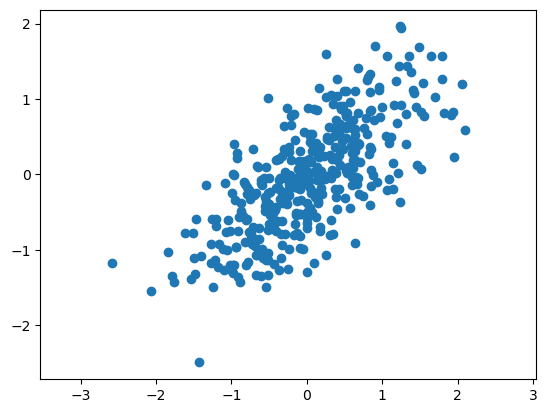

In [2]:
rng=np.random.RandomState(0)
X=rng.randn(2,400)
scale=np.array([[1,0], [0,0.4]])  # Standard deviations are 1 and 0.4
rotate=np.array([[1,-1], [1,1]]) / math.sqrt(2)
transform = np.dot(rotate, scale)
X=np.dot(transform, X)
#X=np.dot(scale, X)
#X=np.dot(rotate, X)
X=X.T
plt.axis('equal')
plt.scatter(X[:,0], X[:,1]);

In [3]:
from sklearn.decomposition import PCA
def arrow(v1, v2, ax):
    arrowprops=dict(arrowstyle='->',
                   linewidth=2,
                   shrinkA=0, shrinkB=0)
    ax.annotate("", v2, v1, arrowprops=arrowprops)
pca=PCA(2)
pca.fit(X)
print("Principal axes:", pca.components_)
print("Explained variance:", pca.explained_variance_)
print("Mean:", pca.mean_)

Principal axes: [[-0.73072907 -0.68266758]
 [-0.68266758  0.73072907]]
Explained variance: [0.97980663 0.16031015]
Mean: [ 0.01333067 -0.05370929]


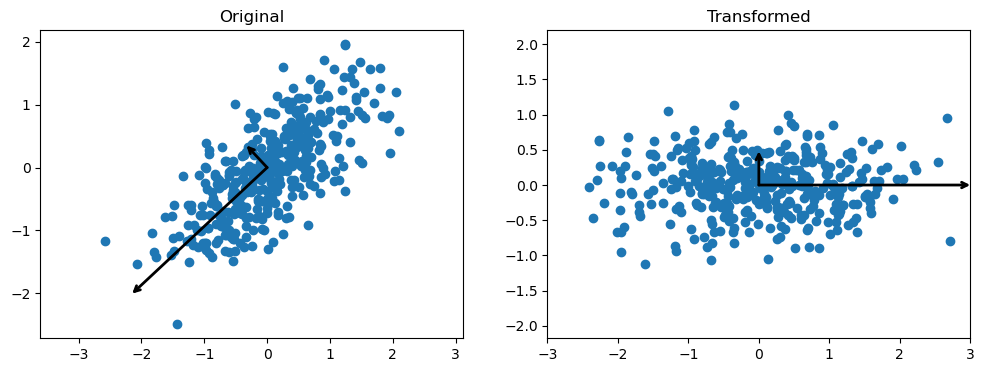

In [4]:
Z=pca.transform(X)
fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].axis('equal')
axes[0].scatter(X[:,0], X[:,1])
axes[1].axis('equal')
axes[1].set_xlim(-3,3)
axes[1].scatter(Z[:,0], Z[:,1])
for l, v in zip(pca.explained_variance_, pca.components_):
    arrow([0,0], v*l*3, axes[0])
for l, v in zip([1.0,0.16], [np.array([1.0,0.0]),np.array([0.0,1.0])]):
    arrow([0,0], v*l*3, axes[1])
axes[0].set_title("Original")
axes[1].set_title("Transformed");

[[-0.73072907 -0.68266758]]


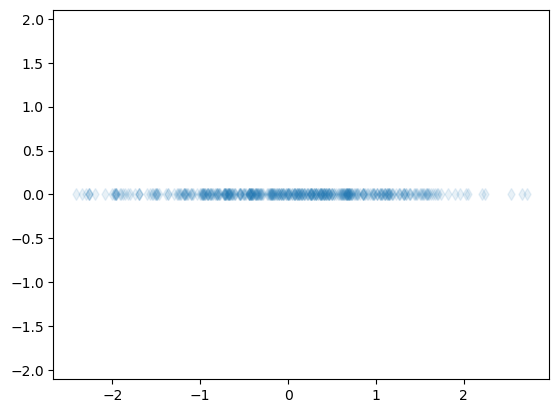

In [5]:
pca=PCA(n_components=1)
pca.fit(X)
Z=pca.transform(X)
print(pca.components_)
plt.axis('equal')
plt.scatter(Z[:,0],np.zeros(400), marker="d", alpha=0.1);

In [6]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(True)
print(X.shape)
print(y.shape)

TypeError: too many positional arguments

[0.97980663 0.16031015]


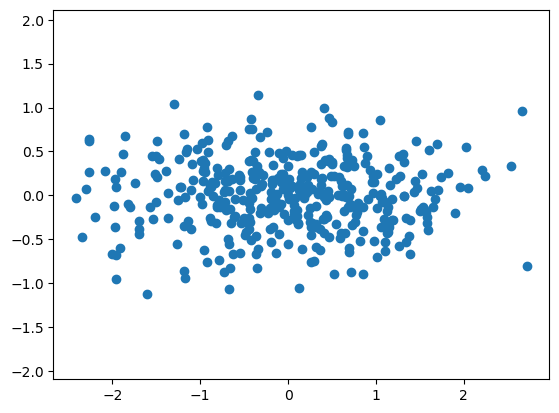

In [7]:
pca=PCA(2)
pca.fit(X)
print(pca.explained_variance_)
Z=pca.transform(X)
plt.axis('equal')
plt.scatter(Z[:,0], Z[:,1]);

In [8]:
rng=np.random.RandomState(0)
X=rng.randn(3,400)
p=rng.rand(10,3)  # Random projection into 10d
X=np.dot(p, X)
print(X)

[[ 0.4891489   0.05331736  0.22206019 ... -0.38084297 -0.71682684
   0.07960158]
 [ 1.43327136  0.08236987  0.83741626 ... -0.56888509 -1.0661402
   0.30652977]
 [ 0.39117808 -0.22450206  0.56194345 ... -0.00355792  0.28652033
   0.00938993]
 ...
 [-0.35164664 -0.99714767  0.79151041 ... -1.11453672 -0.63849744
  -0.72193644]
 [ 1.34095136 -0.32676544  1.33260878 ... -0.2610145  -0.01341865
   0.16976249]
 [ 1.34454622  0.55682337  0.22536013 ... -0.3262513  -1.25934636
   0.52731505]]


[5.84366626e+01 3.69031722e+01 1.56915171e+01 3.09742649e-29
 6.87772072e-30 2.84188925e-30 5.98483579e-31 3.07192747e-31
 2.42259563e-31 1.35745452e-31]


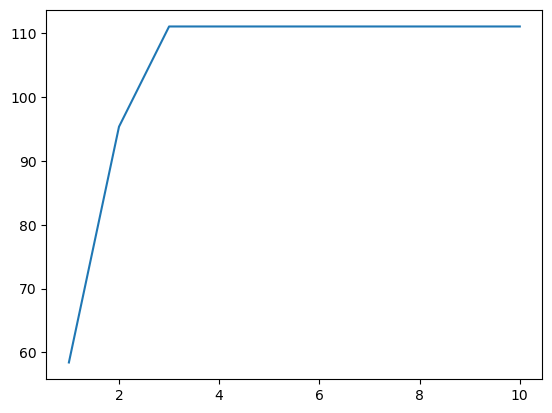

In [9]:
pca=PCA()
pca.fit(X)
v=pca.explained_variance_
print(v)
plt.plot(np.arange(1,11), np.cumsum(v));